<a href="https://colab.research.google.com/github/Tanucode/Deep-Learning-Practice/blob/main/topic%20modelling%20using%20keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_excel ("games.xlsx")
print (df)

             domain             app                             review_id  \
0      productivity        things-3  c9274c0a-a120-4e09-816b-7a8ba3a16634   
1      productivity      notability  e633e20a-07c1-4a5e-80b1-b104b6cf6a61   
2      productivity  microsoft-word  506230e3-cc98-4233-be40-89e52d53990c   
3      productivity        things-3  69d44a5e-218f-4f55-8a99-6cca55d43ca1   
4      productivity      notability  3d0b634c-d402-47e8-ba7d-bf6209fed826   
...             ...             ...                                   ...   
11316         games       among-us-  70d02d85-60b0-4c94-a43d-0307f089e36e   
11317         games  subway-surfers  5431fed8-7c83-4ea1-bc4e-c2282c6f1bbd   
11318         games        monopoly  5880f046-3a22-4dd9-8b01-ab6dea2bd4f6   
11319         games       among-us-  8765dd75-e764-4d94-a2ea-f23c8894908d   
11320         games        heads-up  27d1206e-e930-4944-b4cb-5d61a2e58d91   

                                sentence_id  \
0      00808934-e8b9-42fa-b3

In [6]:
df = df.drop(columns=['app','review_id','sentence_id','title','sentence', 'rating','is_opinion','category','term','from','to'])
# df_cleaned = df.dropna()
print(df)

             domain                                             review  \
0      productivity  This new version of Things has an entirely dif...   
1      productivity  I have been using this app for over 3 years no...   
2      productivity  A lot of people use word because its very stan...   
3      productivity  I was originally skeptical on paying $7 on a t...   
4      productivity  This used to be my go to app for note taking. ...   
...             ...                                                ...   
11316         games  I used to play Among Us but not really anymore...   
11317         games  I have been playing this game since the releas...   
11318         games  NEW PROBLEM: the game consistently mis moves t...   
11319         games  So this is a great game! and if your not playi...   
11320         games  As the title states- I wish I had set a dollar...   

      sentiment  
0      positive  
1           NaN  
2      negative  
3      positive  
4      negative  
...

In [7]:
df['sentiment'].value_counts()

positive    5310
negative    5291
Name: sentiment, dtype: int64

In [8]:
count_nan = df.isna().sum().sum()
print(count_nan)

720


In [9]:
df.isnull().sum()

domain         0
review         0
sentiment    720
dtype: int64

In [10]:
df.duplicated().sum()

5587

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
print(df)

             domain                                             review  \
0      productivity  This new version of Things has an entirely dif...   
1      productivity  I have been using this app for over 3 years no...   
2      productivity  A lot of people use word because its very stan...   
3      productivity  I was originally skeptical on paying $7 on a t...   
4      productivity  This used to be my go to app for note taking. ...   
...             ...                                                ...   
11309         games  I would of course give this game a better rati...   
11311         games  I enjoy this game but as I have progressed I h...   
11312         games  I work at a rehab facility. We would love to u...   
11316         games  I used to play Among Us but not really anymore...   
11319         games  So this is a great game! and if your not playi...   

      sentiment  
0      positive  
1           NaN  
2      negative  
3      positive  
4      negative  
...

In [14]:
df= df.dropna()
print(df)

             domain                                             review  \
0      productivity  This new version of Things has an entirely dif...   
2      productivity  A lot of people use word because its very stan...   
3      productivity  I was originally skeptical on paying $7 on a t...   
4      productivity  This used to be my go to app for note taking. ...   
5      productivity  I use it for years.  It’s tagging capability i...   
...             ...                                                ...   
10868         games  NEW PROBLEM: the game consistently mis moves t...   
10896         games  So amazing game I love it but It gets boring s...   
10903         games  Among us is pretty fun but the thing is I get ...   
10921         games  This game, is literally filled with memories. ...   
10925         games  this game is good in regards to characters and...   

      sentiment  
0      positive  
2      negative  
3      positive  
4      negative  
5      positive  
...

In [15]:
df.isnull().sum()

domain       0
review       0
sentiment    0
dtype: int64

In [16]:
print(df)

             domain                                             review  \
0      productivity  This new version of Things has an entirely dif...   
2      productivity  A lot of people use word because its very stan...   
3      productivity  I was originally skeptical on paying $7 on a t...   
4      productivity  This used to be my go to app for note taking. ...   
5      productivity  I use it for years.  It’s tagging capability i...   
...             ...                                                ...   
10868         games  NEW PROBLEM: the game consistently mis moves t...   
10896         games  So amazing game I love it but It gets boring s...   
10903         games  Among us is pretty fun but the thing is I get ...   
10921         games  This game, is literally filled with memories. ...   
10925         games  this game is good in regards to characters and...   

      sentiment  
0      positive  
2      negative  
3      positive  
4      negative  
5      positive  
...

In [17]:
df['sentiment'] = df['sentiment'].replace({'positive': 1,'negative': 0})
print(df)

             domain                                             review  \
0      productivity  This new version of Things has an entirely dif...   
2      productivity  A lot of people use word because its very stan...   
3      productivity  I was originally skeptical on paying $7 on a t...   
4      productivity  This used to be my go to app for note taking. ...   
5      productivity  I use it for years.  It’s tagging capability i...   
...             ...                                                ...   
10868         games  NEW PROBLEM: the game consistently mis moves t...   
10896         games  So amazing game I love it but It gets boring s...   
10903         games  Among us is pretty fun but the thing is I get ...   
10921         games  This game, is literally filled with memories. ...   
10925         games  this game is good in regards to characters and...   

       sentiment  
0              1  
2              0  
3              1  
4              0  
5              1

In [18]:
df.duplicated().sum()

0

In [19]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

In [20]:
df['review'] = df['review'].apply(remove_tags)

In [21]:
print(df)

             domain                                             review  \
0      productivity  This new version of Things has an entirely dif...   
2      productivity  A lot of people use word because its very stan...   
3      productivity  I was originally skeptical on paying $7 on a t...   
4      productivity  This used to be my go to app for note taking. ...   
5      productivity  I use it for years.  It’s tagging capability i...   
...             ...                                                ...   
10868         games  NEW PROBLEM: the game consistently mis moves t...   
10896         games  So amazing game I love it but It gets boring s...   
10903         games  Among us is pretty fun but the thing is I get ...   
10921         games  This game, is literally filled with memories. ...   
10925         games  this game is good in regards to characters and...   

       sentiment  
0              1  
2              0  
3              1  
4              0  
5              1

In [22]:
df['review'] = df['review'].apply(lambda x:x.lower())
print(df)

             domain                                             review  \
0      productivity  this new version of things has an entirely dif...   
2      productivity  a lot of people use word because its very stan...   
3      productivity  i was originally skeptical on paying $7 on a t...   
4      productivity  this used to be my go to app for note taking. ...   
5      productivity  i use it for years.  it’s tagging capability i...   
...             ...                                                ...   
10868         games  new problem: the game consistently mis moves t...   
10896         games  so amazing game i love it but it gets boring s...   
10903         games  among us is pretty fun but the thing is i get ...   
10921         games  this game, is literally filled with memories. ...   
10925         games  this game is good in regards to characters and...   

       sentiment  
0              1  
2              0  
3              1  
4              0  
5              1

In [23]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [24]:
print(df)

             domain                                             review  \
0      productivity  new version things entirely different aestheti...   
2      productivity  lot people use word standard. run problem use ...   
3      productivity  originally skeptical paying $7 todo list app, ...   
4      productivity  used go app note taking. year problems writing...   
5      productivity  use years. it’s tagging capability unique. it’...   
...             ...                                                ...   
10868         games  new problem: game consistently mis moves piece...   
10896         games  amazing game love gets boring trying help thin...   
10903         games  among us pretty fun thing get disconnected reg...   
10921         games  game, literally filled memories. playing game ...   
10925         games  game good regards characters visuals controls,...   

       sentiment  
0              1  
2              0  
3              1  
4              0  
5              1

In [28]:
from bs4 import BeautifulSoup


def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [29]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [30]:
df['review'] = df['review'].apply(preprocess)

<ipython-input-28-abebe8c1d1e4>:163: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [31]:
print(df)

             domain                                             review  \
0      productivity  new version things entirely different aestheti...   
2      productivity  lot people use word standard  run problem use ...   
3      productivity  originally skeptical paying dollar 7 todo list...   
4      productivity  used go app note taking  year problems writing...   
5      productivity  use years  it s tagging capability unique  it ...   
...             ...                                                ...   
10868         games  new problem  game consistently mis moves piece...   
10896         games  amazing game love gets boring trying help thin...   
10903         games  among us pretty fun thing get disconnected reg...   
10921         games  game  literally filled memories  playing game ...   
10925         games  game good regards characters visuals controls ...   

       sentiment  
0              1  
2              0  
3              1  
4              0  
5              1

In [32]:
df['domain'].value_counts()

productivity         2378
social networking    1974
games                 866
Name: domain, dtype: int64

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer


corpus = df['review']


vectorizer = TfidfVectorizer(stop_words='english')

# Transform the reviews into TF-IDF features
tfidf_matrix = vectorizer.fit_transform(corpus)


categories = df['domain'].unique()

# Print top keywords for each category
for category in categories:
    category_reviews = df[df['domain'] == category]['review']
    category_tfidf = vectorizer.transform(category_reviews)

    # Get feature names (words) and their corresponding TF-IDF values
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = category_tfidf.sum(axis=0).A1

    # Print top N keywords for the category
    print(f"\nTop keywords for '{category}':")
    for idx in tfidf_scores.argsort()[-10:][::-1]:
        print(f"{feature_names[idx]}: {tfidf_scores[idx]}")


Top keywords for 'productivity':
app: 156.79400452630983
notes: 81.56923960530484
use: 76.44901248216028
like: 62.442289004342804
evernote: 57.76025766998397
word: 57.36682391847334
time: 55.6752839815997
things: 54.761916797251
email: 54.47304805535941
gmail: 54.20511380677306

Top keywords for 'social networking':
app: 120.46587261659671
discord: 66.81261742358136
phone: 61.6513685638876
whatsapp: 51.767443061965245
facebook: 51.63221535893974
update: 49.15631999467634
messages: 49.11141895978327
calls: 48.771796197702514
text: 48.20144484519524
like: 45.576538919444594

Top keywords for 'games':
game: 162.36473876447295
play: 55.72653738770592
fun: 37.9978376928538
like: 35.755868693064436
playing: 34.362040811853426
really: 27.610772833789905
time: 26.242602847771625
games: 25.92915091826137
people: 24.221638476833277
don: 23.629373972455245


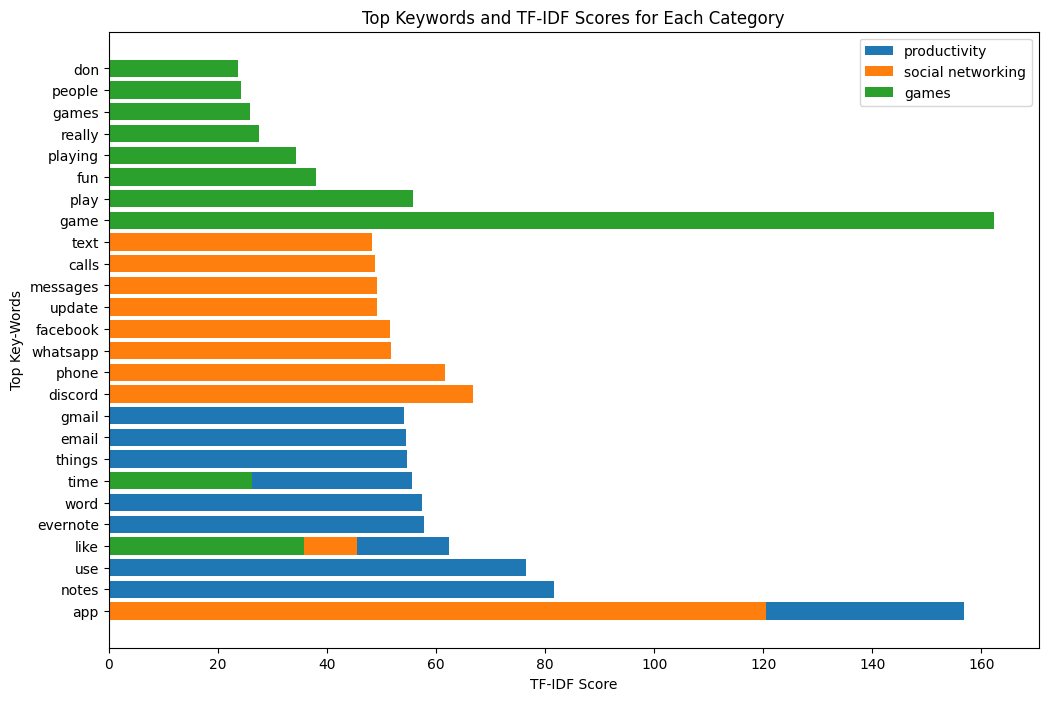

In [72]:
import matplotlib.pyplot as plt

# Assuming 'review' is the column containing the review text and 'domain' is the column containing categories
corpus = df['review']
categories = df['domain']

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

# Plotting the graph
plt.figure(figsize=(12, 8))

# Iterate over categories
for category in categories.unique():
    category_reviews = df[df['domain'] == category]['review']
    category_tfidf = vectorizer.transform(category_reviews)

    # Get feature names (words) and their corresponding TF-IDF values
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = category_tfidf.sum(axis=0).A1

    # Select the top N keywords
    top_keywords_idx = tfidf_scores.argsort()[-10:][::-1]
    top_keywords = [feature_names[idx] for idx in top_keywords_idx]
    top_scores = [tfidf_scores[idx] for idx in top_keywords_idx]

    # Plotting a bar chart for each category
    plt.barh(top_keywords, top_scores, label=category)

plt.xlabel('TF-IDF Score')
plt.ylabel('Top Key-Words')
plt.title('Top Keywords and TF-IDF Scores for Each Category')
plt.legend()
plt.show()


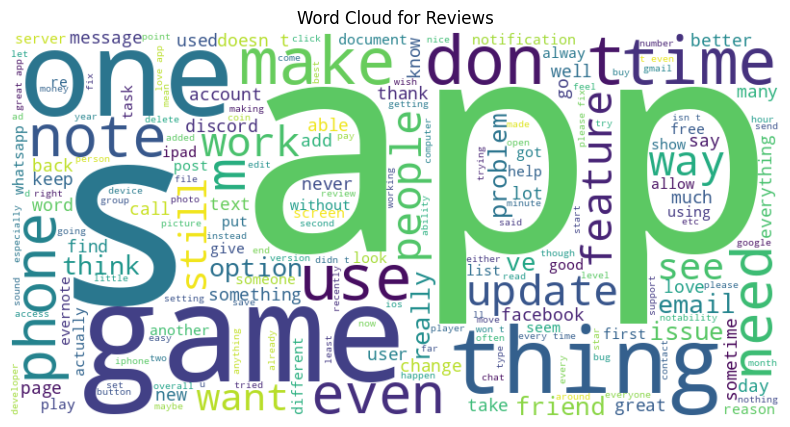

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'review' is the column containing the review text
text = ' '.join(df['review'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()


In [73]:
# Example keywords for each category
productivity_keywords = ['productive', 'efficiency', 'work', 'tasks','app','notes','use','like','evernote','word','time','things','email','gmail','todo-list']
social_keywords = ['social', 'network', 'friends', 'chat','app','discord','phone','whatsapp','facebook','update','messages','calls','text','talk','chatting']
games_keywords = ['game','games','gaming', 'play', 'fun','playing','raelly','time','people','don','childhood','memories']

# Function to assign category based on keywords
def assign_category(tweet):
    productivity_score = sum(word in tweet for word in productivity_keywords)
    social_score = sum(word in tweet for word in social_keywords)
    games_score = sum(word in tweet for word in games_keywords)

    scores = {'productivity': productivity_score, 'social networking': social_score, 'games': games_score}
    return max(scores, key=scores.get)


df['predicted_category'] = df['review'].apply(assign_category)
print(df)

             domain                                             review  \
0      productivity  new version things entirely different aestheti...   
2      productivity  lot people use word standard  run problem use ...   
3      productivity  originally skeptical paying dollar 7 todo list...   
4      productivity  used go app note taking  year problems writing...   
5      productivity  use years  it s tagging capability unique  it ...   
...             ...                                                ...   
10868         games  new problem  game consistently mis moves piece...   
10896         games  amazing game love gets boring trying help thin...   
10903         games  among us pretty fun thing get disconnected reg...   
10921         games  game  literally filled memories  playing game ...   
10925         games  game good regards characters visuals controls ...   

       sentiment predicted_category  
0              1       productivity  
2              0       productivity

In [77]:
df['review'][10868]

'new problem  game consistently mis moves pieces  thought making mistakes nope every game happens several times  roll five   go 6 land someone s hotel   incredibly frustrating  game also predictable  build properties next roll next player almost every time land you  like game  however another issue freezes crucial junctures game  trade  choice several minutes abandon game  frustrating vesting much time it  also finished game   bankrupted every player announced last bankrupted player  winner    ticks especially spending hour idiots want make trade every single turn  almost quit several times hung put normal player suffering bs like was  game definitely needs improvements  would give 3 1 2 stars won t let me  please fix freeze problem  constant connection problems too  check internet   it s connected  devices working'

In [74]:
df['domain'].value_counts()

productivity         2378
social networking    1974
games                 866
Name: domain, dtype: int64

In [75]:
df['predicted_category'].value_counts()

productivity         3480
social networking    1082
games                 656
Name: predicted_category, dtype: int64

In [76]:
# Test with a new review
test_review1 = "I really love using Evernote for my work. It helps me stay organized and productive."
test_review2 = "gaming has fun literally take me back to childhood memories "
test_review3 = "I want to talk with peolple and my teammates  for my task in office "
test_review4 = "I want to talk with peolple and my teammates  for my tasks in office "
test_review5 = "google apps are so smooth "
predicted_category1 = assign_category(test_review1)
predicted_category2 = assign_category(test_review2)
predicted_category3 = assign_category(test_review3)
predicted_category4 = assign_category(test_review4)
predicted_category5 = assign_category(test_review5)
print(f"Predicted Category for the test review: {predicted_category1}")
print(f"Predicted Category for the test review: {predicted_category2}")
print(f"Predicted Category for the test review: {predicted_category3}")
print(f"Predicted Category for the test review: {predicted_category4}")
print(f"Predicted Category for the test review: {predicted_category5}")

Predicted Category for the test review: productivity
Predicted Category for the test review: games
Predicted Category for the test review: social networking
Predicted Category for the test review: productivity
Predicted Category for the test review: productivity
